In [1]:
#filename_tbl <- '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.refined.txt'
#filename_qnorm <- '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.qnorm.txt'
filename_tbl <- '../../data/03_ShawnJe/Je201710_Lipidomics/201708_OrganoidLipidomics.refined.txt'
filename_qnorm <- '../../data/03_ShawnJe/Je201710_Lipidomics/201708_OrganoidLipidomics.qnorm.txt'

tbl <- read.table(filename_tbl, row.names="TargetName", header=T)

## quantile normalization
# installation
#source('http://bioconductor.org/biocLite.R')
#biocLite('preprocessCore')

# loading package
library(preprocessCore)

tbl_norm <- normalize.quantiles( as.matrix(tbl) )
rownames(tbl_norm) <- rownames(tbl)
colnames(tbl_norm) <- colnames(tbl)
write.table(tbl_norm, file=filename_qnorm, sep='\t')

## Boxplot

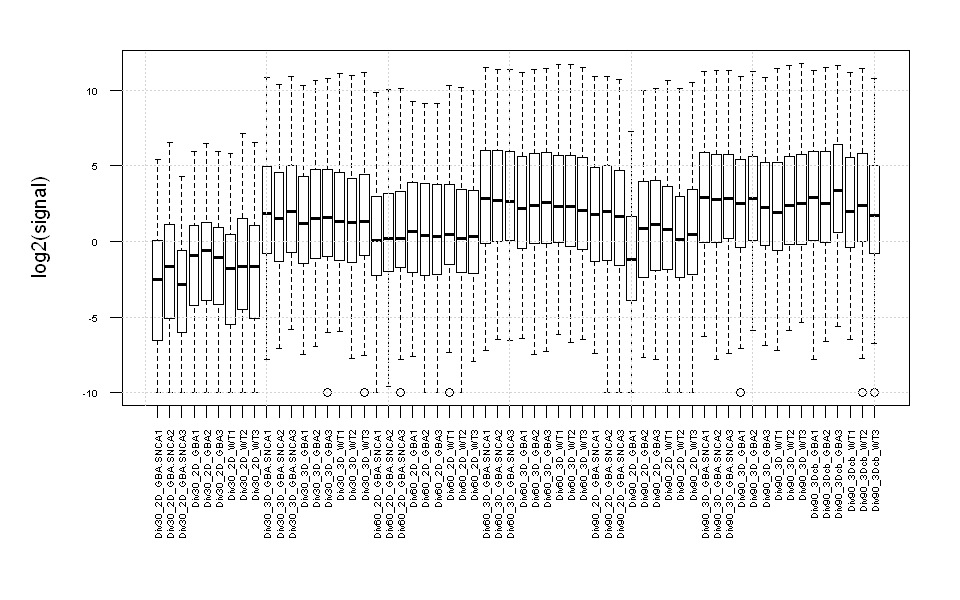

In [7]:
library(repr)
options(repr.plot.width=8, repr.plot.height=5)

par(mar = c(8,5,2,2) + 0.1)
boxplot(log(tbl+0.001, 2), las=2, ylab="log2(signal)", cex.axis=0.5)
grid()

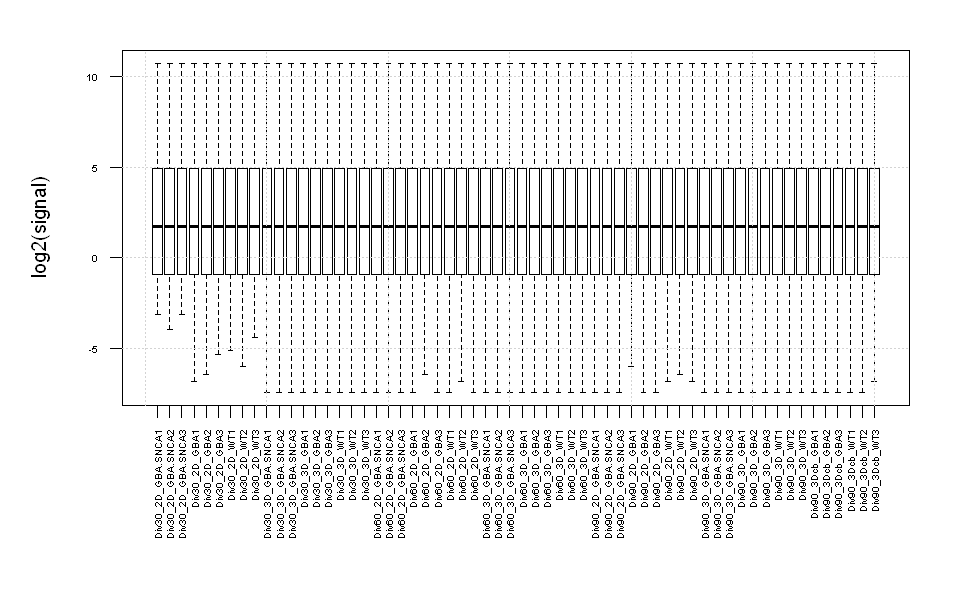

In [8]:
library(repr)
options(repr.plot.width=8, repr.plot.height=5)

par(mar = c(8,5,2,2) + 0.1)
boxplot(log(tbl_norm+0.001, 2), las=2, ylab="log2(signal)", cex.axis=0.5)
grid()

## Hierarchical clustering

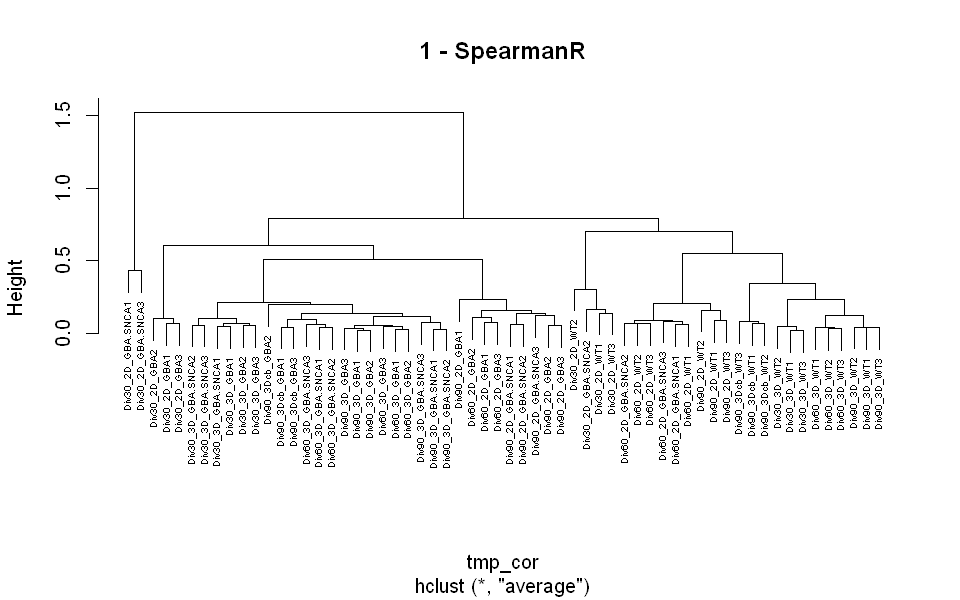

In [10]:
tmp_cor <- dist( 1 - cor(as.matrix(tbl_norm),method='spearman') )
tmp_clust <- hclust( tmp_cor, method="average")
plot(tmp_clust, main="1 - SpearmanR", cex=0.5)

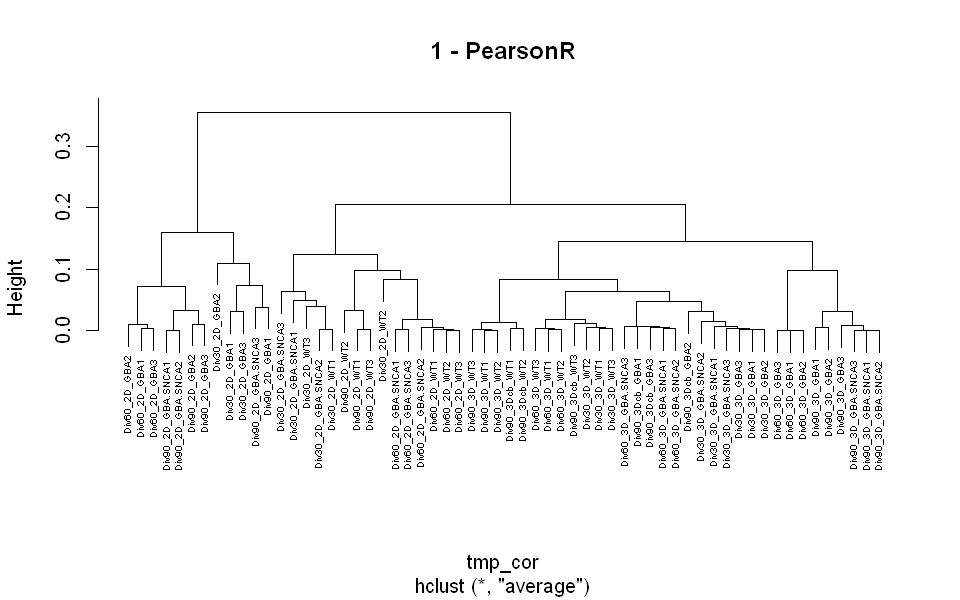

In [11]:
tmp_cor <- dist( 1 - cor(as.matrix(tbl_norm),method='pearson') )
tmp_clust <- hclust( tmp_cor, method="average")
plot(tmp_clust, main="1 - PearsonR", cex=0.5)

## Differential analysis with limma

In [75]:
library(limma)

filename_limma <- '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.GBA-WT.limma_out.txt'

tbl_MA <- new("MAList",list(M=tbl_norm,A=tbl_norm))
colnames(tbl_MA)

groups <- gsub('[123]$','', colnames(tbl_MA))
groups <- gsub('Div[369]0_','', groups)
groups

design <- model.matrix( ~ as.factor(groups) )
design

v <- voom(tbl_MA, design)
fit <- lmFit(v, design)
fit <- eBayes(fit, trend=TRUE)

write.table( topTable(fit, coef=ncol(design), confint=TRUE, n=Inf, adjust="BH"), filename_limma )

[1] "Div30_GBA1" "Div30_GBA2" "Div30_GBA3" "Div30_WT1"  "Div30_WT2" 
 [6] "Div30_WT3"  "Div60_GBA1" "Div60_GBA2" "Div60_GBA3" "Div60_WT1" 
[11] "Div60_WT2"  "Div60_WT3"  "Div90_GBA1" "Div90_GBA2" "Div90_GBA3"
[16] "Div90_WT1"  "Div90_WT2"  "Div90_WT3"

[1] "GBA" "GBA" "GBA" "WT"  "WT"  "WT"  "GBA" "GBA" "GBA" "WT"  "WT"  "WT" 
[13] "GBA" "GBA" "GBA" "WT"  "WT"  "WT"

,(Intercept),as.factor(groups)WT
1,1,0
2,1,0
3,1,0
4,1,1
5,1,1
6,1,1
7,1,0
8,1,0
9,1,0
10,1,1


In [87]:
groups <- gsub('[123]$','', colnames(tbl_MA))
#groups <- gsub('Div[369]0_','', groups)
groups

design <- model.matrix(~ 0+as.factor(groups))
colnames(design) <- c("Div30_GBA", "Div30_WT", "Div60_GBA", "Div60_WT", "Div90_GBA", "Div90_WT")
design

v <- voom(tbl_MA, design)
fit <- lmFit(v, design)

contrast.matrix <- makeContrasts(Div30_GBA-Div30_WT, Div60_GBA-Div60_WT, Div90_GBA-Div90_WT, levels=design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2, trend=TRUE)

filename_limma <- '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.Div30_GBA-WT.limma_out.txt'
write.table( topTable(fit2, coef=1, confint=TRUE, n=Inf, adjust="BH"), filename_limma )

filename_limma <- '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.Div60_GBA-WT.limma_out.txt'
write.table( topTable(fit2, coef=2, confint=TRUE, n=Inf, adjust="BH"), filename_limma )

filename_limma <- '../../data/03_ShawnJe/Je201710_Lipidomics/201612_OrganoidLipidomics.Div90_GBA-WT.limma_out.txt'
write.table( topTable(fit2, coef=3, confint=TRUE, n=Inf, adjust="BH"), filename_limma )

[1] "Div30_GBA" "Div30_GBA" "Div30_GBA" "Div30_WT"  "Div30_WT"  "Div30_WT" 
 [7] "Div60_GBA" "Div60_GBA" "Div60_GBA" "Div60_WT"  "Div60_WT"  "Div60_WT" 
[13] "Div90_GBA" "Div90_GBA" "Div90_GBA" "Div90_WT"  "Div90_WT"  "Div90_WT"

,Div30_GBA,Div30_WT,Div60_GBA,Div60_WT,Div90_GBA,Div90_WT
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,1,0,0,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0
9,0,0,1,0,0,0
10,0,0,0,1,0,0
